base on http://scikit-learn.org/stable/modules/linear_model.html

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns


- y_hat(w,x) = w_0 + w_1*x_1 + ... + w_p*x_p
- to perform classification with generalized linear models, we use 'logistic regression'

### OLS

LinearRegresiion fits a linear model with coef 'w' to minimize the RSS and the responses predicted by the linear approximation.

linearregression will take in its 'fit' mehotd array X,y and will store the coef w of the linear model in its coef_ member

In [2]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [3]:
reg.coef_

array([0.5, 0.5])

coef estimate for OLS reply on the independence of the model terms. when terms are correlated and the col of the design matrix have an approimate linear dependence, the design matrix becomes close toe singular and as a result, the leat-squares estimate becomes highly sensitive to random errors in the observed response. this situation of multicollinearity can arise

### Ridge Regression
- addresses some of the problems of OLS by imposing a penlaty on the size of coef. The ridge coef minimize a penalized RSS
- `minarg_w norm(Xw-y) + lambda*norm(w) -- norm(x)--squared norm`
- here lambda>0 is a complexity paramter that controls the amount of shrinkage: the larger the value of lambda the greater the amount of shrinkage and thus the coef become more robust to collinearity.

In [4]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [5]:
reg.coef_

array([0.34545455, 0.34545455])

In [6]:
reg.intercept_

0.1363636363636364

### Plog Ridge coef as a function of the regularization

- applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variance in the calculated weights. In such cases, it is useful to set a certain regularizaiton to reduce this variation(noise).
- when alpha is very large, the regularization effect dominates the squared loss function and the coef then to zero. At the end of the path, as alpha tends towards zero and the solution tends toward the OLS, coef exhibit big oscillations.(vibrates)

Automatically created module for IPython interactive environment


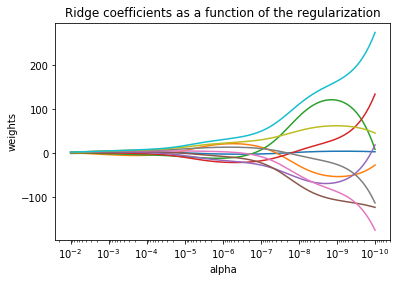

In [7]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### Lasso
- the lasso is a linear model that estimates sparse coef. it is useful in some contexts due to its tendency to prefer solutions with fewer params valeues, effectively reducing the number of variables upon wich the given soluion is dependent. For this reason. the lasso nad its variants are fundamental to the field of compressed sensing.
- `minarg_w 1/2n(samples) * norm(Xw-y) + lambda * norm(w)_1  -- norm(X) : squared norm norm(x)_1 : non-squared_norm(absolute value)`
- lasso uses absolute value of parameter(w) 

In [8]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
reg.coef_

array([0.6, 0. ])

In [11]:
reg.intercept_

0.2

In [9]:
reg.predict([[1,1]])

array([0.8])

### Lasso model selection : CV/AIC/BIC
- use AIC, BIC and CV to select and optimal value of the regularizaiton params alph of the lasso estimator.
- Results obtained with LassoLarsIC are base on AIC/BIC criteria.
- infomation-criterion based model selection is very fast ,but it relies on a prepoer estimation of df, are derived for large smaples and assume the model is correct, they also thend to break when the problem is badly conditioned)more features than smaples)

### Elastic Net
- linear regression model trained with L1 and L2 prior as regularizer. This comb allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.
- Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.
- `minarg_w 1/2n(samples) norm(Xw-y) + lambda(p) norm(w)_1 + lambda(1-p)/2*norm(w)`

### Polynomial regression : extending linear models with basis function
- a simple linear regression can be extended by constructing polynomial features from the coef. `y_hat(w,x) = w_0 + w_1*x_1 + w_2*x_2`
- if we wanna fit a paraboloid to the data instead of a plhane.we can combine the features in second-order polynomials, so that the model looks like this: `y_hat(w,x) = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1^2 + w_4*x_2^2`
- With this re-labeling of the data, our problem can be written `y_hat(w,x) = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_3 + w_4*x_4`
- we see that the resulting polynomial regression is in the same class of linear models we'd considered aboce and can be solved by the same tech. 
- This figure is created using the `PolynomialFeatures` preprocessor. This preprocessor transforms an input data matrix into a new data matrix of a given `degree`. It can be used as follows:

In [3]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

- the features of X have been transformed from [x_1,x_2] to [1,x_1,x_2,x_1^2,x_1,x_2,x_2^2] and can now be used within any linear model.
- this sort of preprocessing can be streamlined with the `Pipeline` tools. A single object representing a simple polynomial regression can be created and used as follows:

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [8]:
model = Pipeline([('poly',PolynomialFeatures(degree=3)),\
                 ('linear',LinearRegression(fit_intercept=False))])
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

- the linear model trained on polynomial features is able to exactly recover the input polynomial coef. 
- in some cases it's not necessary to include highter powers of any single features, but only the so-called interaction features that multiply together at most distinct featuers, these can be gotter nfrom `Polynomialfeatures` with the setting `interaction_only=True`

In [13]:
x= np.arange(6).reshape(3,2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [14]:
poly = PolynomialFeatures(2)
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

1,x1,x2,x1^2.x1*x2,x2^2

In [15]:
poly = PolynomialFeatures(2,interaction_only=True)
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

## Logistic regression
- linear model for classification rather than regression.
- is also known in the literatures as logit regression, maximum-entropy classification or the log-linear classifier.

solve the logistic regression by using statsdmodels

In [4]:
import statsmodels.api as sm
from sklearn.datasets import make_classification

In [5]:
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [7]:
model = sm.Logit(y,X)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        15:14:10   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


solve the logistic regression by using scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [13]:
model = LogisticRegression().fit(X0,y)
print(classification_report(y,model.predict(X0)))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95        49
          1       0.96      0.94      0.95        51

avg / total       0.95      0.95      0.95       100



In [16]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


In [17]:
model = sm.Logit.from_formula('InMichelin ~ Food + Decor + Service + Price',df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.3428
Time:                        15:17:20   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.2

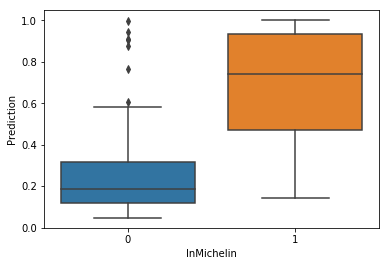

In [18]:
df["Prediction"] = result.predict(df)
sns.boxplot(x="InMichelin", y="Prediction", data=df)
plt.show()

solving the linear regression problem by using Logistic regression(not classification)

In [19]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt", sep="\t")
df.tail()

,Food,InMichelin,NotInMichelin,mi,proportion
9,24,6,1,7,0.86
10,25,11,1,12,0.92
11,26,1,1,2,0.50
12,27,6,1,7,0.86
13,28,4,0,4,1.00


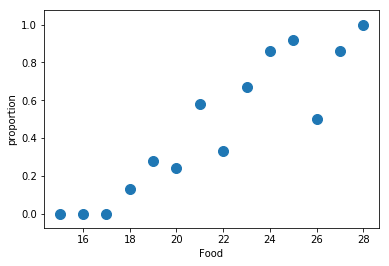

In [20]:
df.plot(kind="scatter", x="Food", y="proportion", s=100)
plt.show()

In [21]:
X = sm.add_constant(df.Food)
y = df.proportion
model = sm.Logit(y, X)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Jul 2018   Pseudo R-squ.:                  0.4816
Time:                        15:18:42   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.5904
                                        LLR p-value:                  0.002370
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047     -20.574      -0.146
Food           0.4671      0.235      1.991      0.046       0.007       0.927


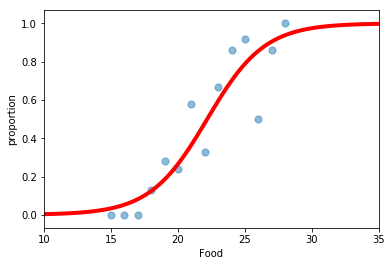

In [22]:
df.plot(kind="scatter", x="Food", y="proportion", s=50, alpha=0.5)
xx = np.linspace(10, 35, 100)
plt.plot(xx, result.predict(sm.add_constant(xx)), "r", lw=4)
plt.xlim(10, 35)
plt.show()

### Logistic Regression 3-class Classifier
- show below is a logistic-regression classifiers decision boundaries on the iris dataset. The datapoints are colored according to their labels.

Automatically created module for IPython interactive environment


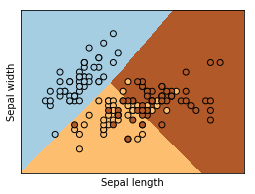

In [33]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
